## Подготовка среды

In [ ]:
# работа с ОС
import warnings
from google.colab import drive
# работа с данными
import numpy as np
import pandas as pd
import pickle
# работа с ML
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# визуализация
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure
import seaborn as sns
from tqdm import tqdm


drive.mount("/content/drive")
pd.options.display.max_rows = 93
pd.options.display.max_columns = 93
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
!pip freeze | grep "numpy\|pandas\|lightgbm\|scikit-learn"
!pip install pyarrow

geopandas==0.13.2
lightgbm==4.1.0
numpy==1.25.2
pandas==2.0.3
pandas-datareader==0.10.0
pandas-gbq==0.19.2
pandas-stubs==2.0.3.230814
scikit-learn==1.2.2
sklearn-pandas==2.2.0


## Подготовка данных

In [ ]:
train_df = pd.read_parquet("/content/drive/MyDrive/restored_train_full_without_start.pqt", engine='auto')
test_df = pd.read_parquet("/content/drive/MyDrive/restored_test_full_without_start.pqt", engine='auto')

In [ ]:
display(train_df.head(2))
display(test_df.head(2))

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,ogrn_days_end_quarter,ogrn_month,ogrn_year,ft_registration_date,max_founderpres,min_founderpres,ogrn_exist_months,okved,segment,sum_of_paym_2m,sum_of_paym_6m,sum_of_paym_1y,sum_a_oper_1m,cnt_a_oper_1m,sum_b_oper_1m,cnt_b_oper_1m,sum_c_oper_1m,cnt_c_oper_1m,sum_deb_d_oper_1m,cnt_deb_d_oper_1m,sum_cred_d_oper_1m,cnt_cred_d_oper_1m,sum_deb_e_oper_1m,cnt_deb_e_oper_1m,cnt_days_deb_e_oper_1m,sum_cred_e_oper_1m,cnt_cred_e_oper_1m,cnt_days_cred_e_oper_1m,sum_deb_f_oper_1m,cnt_deb_f_oper_1m,cnt_days_deb_f_oper_1m,sum_cred_f_oper_1m,cnt_cred_f_oper_1m,cnt_days_cred_f_oper_1m,sum_deb_g_oper_1m,cnt_deb_g_oper_1m,cnt_days_deb_g_oper_1m,sum_cred_g_oper_1m,cnt_cred_g_oper_1m,cnt_days_cred_g_oper_1m,sum_deb_h_oper_1m,cnt_deb_h_oper_1m,cnt_days_deb_h_oper_1m,sum_cred_h_oper_1m,cnt_cred_h_oper_1m,cnt_days_cred_h_oper_1m,sum_a_oper_3m,cnt_a_oper_3m,sum_b_oper_3m,cnt_b_oper_3m,sum_c_oper_3m,cnt_c_oper_3m,sum_deb_d_oper_3m,cnt_deb_d_oper_3m,sum_cred_d_oper_3m,cnt_cred_d_oper_3m,sum_deb_e_oper_3m,cnt_deb_e_oper_3m,cnt_days_deb_e_oper_3m,sum_cred_e_oper_3m,cnt_cred_e_oper_3m,cnt_days_cred_e_oper_3m,sum_deb_f_oper_3m,cnt_deb_f_oper_3m,cnt_days_deb_f_oper_3m,sum_cred_f_oper_3m,cnt_cred_f_oper_3m,cnt_days_cred_f_oper_3m,sum_deb_g_oper_3m,cnt_deb_g_oper_3m,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,month_1,0.744845,0.705492,1.287207,0.748101,channel_code_5,city_23,city_type_0,index_city_code_39,-0.488553,-0.135063,ogrn_month_0,ogrn_year_1,2.452182,2.736461,2.932560,2.437979,okved_30,segment_1,0.942275,0.536013,0.511490,-0.188835,0.417022,-0.030225,0.435995,-0.103359,0.550798,-0.128513,0.967030,-0.063678,0.221993,0.396523,0.893064,0.463405,0.505823,0.873795,0.623277,-0.125219,0.771335,0.212528,-0.017983,0.154163,0.777702,-0.041418,0.513943,0.848818,0.099899,0.226247,0.391439,1.054211,0.654057,0.387856,1.17102,0.648942,0.661628,-0.207082,0.208461,-0.029964,0.517298,-0.119654,0.960017,-0.143207,0.870124,-0.084701,0.307935,0.356556,0.426034,1.201541,0.435983,0.864246,1.270517,-0.152107,0.286074,0.891856,-0.025646,0.24851,0.038562,-0.040649,0.458055,0.728507,0.186820,0.951166,0.568681,0.897565,0.553624,0.774354,0.936506,0.295984,0.967947,"{α, γ}",{other}
1,0,month_2,1.049605,0.831916,2.458609,1.053805,channel_code_5,city_23,city_type_0,index_city_code_39,-0.488553,-0.135063,ogrn_month_0,ogrn_year_1,2.469917,2.756014,2.952725,2.455375,okved_30,segment_1,0.645704,0.536378,0.486425,-0.188835,0.417022,-0.030225,0.435995,-0.103359,0.550798,-0.088209,0.969891,-0.063678,0.221993,0.131636,0.893042,0.398889,0.095082,0.873685,0.526503,-0.101797,0.771350,0.244786,-0.017983,0.154163,0.777702,-0.041418,0.513943,0.848818,-0.021465,0.224276,0.326923,0.419979,0.652830,0.258824,0.41041,0.633498,0.564854,-0.207082,0.208461,-0.029964,0.517298,-0.119654,0.960017,-0.127755,0.870983,-0.084701,0.307935,0.302226,0.425993,1.135607,0.411205,0.864251,1.237550,-0.142187,0.286081,0.902845,-0.025646,0.24851,0.038562,-0.040649,0.458055,0.728507,0.125043,0.948812,0.499716,0.785029,0.551904,0.696576,0.990157,0.298873,0.945969,"{α, γ}",{other}


,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,ogrn_days_end_quarter,ogrn_month,ogrn_year,ft_registration_date,max_founderpres,min_founderpres,ogrn_exist_months,okved,segment,sum_of_paym_2m,sum_of_paym_6m,sum_of_paym_1y,sum_a_oper_1m,cnt_a_oper_1m,sum_b_oper_1m,cnt_b_oper_1m,sum_c_oper_1m,cnt_c_oper_1m,sum_deb_d_oper_1m,cnt_deb_d_oper_1m,sum_cred_d_oper_1m,cnt_cred_d_oper_1m,sum_deb_e_oper_1m,cnt_deb_e_oper_1m,cnt_days_deb_e_oper_1m,sum_cred_e_oper_1m,cnt_cred_e_oper_1m,cnt_days_cred_e_oper_1m,sum_deb_f_oper_1m,cnt_deb_f_oper_1m,cnt_days_deb_f_oper_1m,sum_cred_f_oper_1m,cnt_cred_f_oper_1m,cnt_days_cred_f_oper_1m,sum_deb_g_oper_1m,cnt_deb_g_oper_1m,cnt_days_deb_g_oper_1m,sum_cred_g_oper_1m,cnt_cred_g_oper_1m,cnt_days_cred_g_oper_1m,sum_deb_h_oper_1m,cnt_deb_h_oper_1m,cnt_days_deb_h_oper_1m,sum_cred_h_oper_1m,cnt_cred_h_oper_1m,cnt_days_cred_h_oper_1m,sum_a_oper_3m,cnt_a_oper_3m,sum_b_oper_3m,cnt_b_oper_3m,sum_c_oper_3m,cnt_c_oper_3m,sum_deb_d_oper_3m,cnt_deb_d_oper_3m,sum_cred_d_oper_3m,cnt_cred_d_oper_3m,sum_deb_e_oper_3m,cnt_deb_e_oper_3m,cnt_days_deb_e_oper_3m,sum_cred_e_oper_3m,cnt_cred_e_oper_3m,cnt_days_cred_e_oper_3m,sum_deb_f_oper_3m,cnt_deb_f_oper_3m,cnt_days_deb_f_oper_3m,sum_cred_f_oper_3m,cnt_cred_f_oper_3m,cnt_days_cred_f_oper_3m,sum_deb_g_oper_3m,cnt_deb_g_oper_3m,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,index_city_code_133,-1.533705,-1.683741,ogrn_month_8,ogrn_year_11,-0.653810,-0.64287,0.119939,-0.658497,okved_0,segment_3,0.416833,0.332409,0.676573,0.532156,0.421695,-0.030225,0.435995,1.123507,0.552726,-0.128513,0.96703,-0.063678,0.221993,0.278159,0.893289,0.818244,0.266375,0.873550,0.526503,4.591710,0.77135,0.244786,-0.017983,0.154163,0.777702,-0.034588,0.515230,0.913334,0.078352,0.226247,0.326923,-0.144097,0.652523,0.291082,0.413722,0.605505,0.500338,0.957934,0.214730,-0.029964,0.517298,1.660281,0.963300,-0.143207,0.870124,-0.055135,0.309193,0.175471,0.426448,1.366376,0.143413,0.863866,0.951836,3.136945,0.286081,0.902845,-0.025646,0.24851,0.038562,0.026364,0.460730,0.849386,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,index_city_code_133,-1.533705,-1.683741,ogrn_month_8,ogrn_year_11,-0.636647,0.00660,-0.000289,-0.641101,okved_0,segment_3,0.433195,0.284317,0.688449,-0.069498,0.421695,-0.030225,0.435995,4.983369,0.556064,-0.128513,0.96703,0.089395,0.223973,0.119735,0.893536,0.850502,0.131938,0.873598,0.526503,1.399146,0.77135,0.244786,-0.017983,0.154163,0.777702,-0.010645,0.514586,0.881076,-0.029795,0.223291,0.294665,-0.145537,0.652216,0.194308,0.363179,0.612262,0.532596,1.002756,0.216298,-0.029964,0.517298,3.022775,0.963687,-0.143207,0.870124,-0.008083,0.309193,0.195415,0.426482,1.410332,0.189248,0.863929,1.061726,3.136964,0.286088,0.913834,-0.025646,0.24851,0.038562,0.003038,0.459615,0.805430,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}


### Предобработка численных признаков

#### Выделение сильной корреляции

In [ ]:
num_type_corr_train = train_df.select_dtypes(include='number').corr()
mask = np.triu(num_type_corr_train, 1)

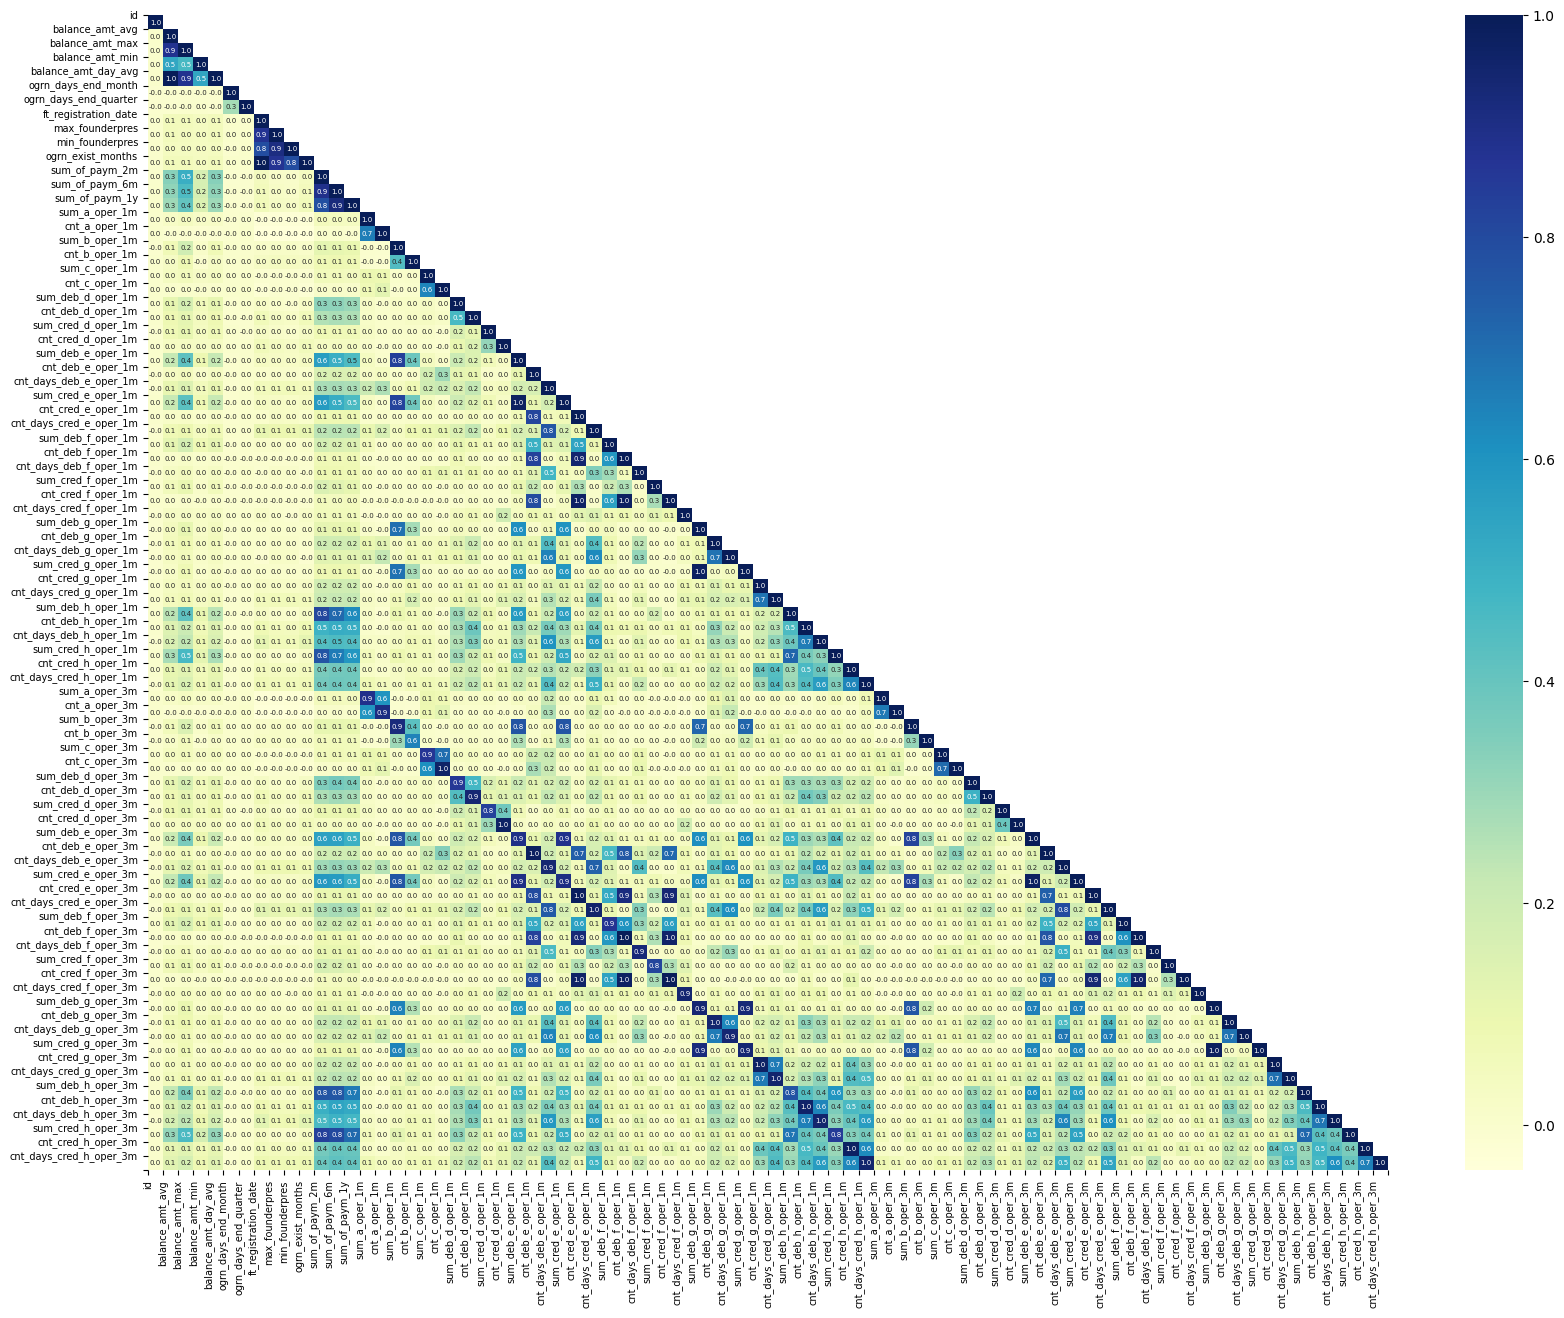

In [ ]:
figure(figsize=(20, 15))
dataplot = sns.heatmap(num_type_corr_train, mask=mask,
                      cmap="YlGnBu", annot=True, fmt=".1f",
                      annot_kws={'size': 5})
dataplot.xaxis.set_major_locator(MaxNLocator(len(num_type_corr_train.columns)))
dataplot.yaxis.set_major_locator(MaxNLocator(len(num_type_corr_train.columns)))
dataplot.set_xticklabels(num_type_corr_train.columns, rotation=90, fontsize=7)
dataplot.set_yticklabels(num_type_corr_train.columns, rotation=0, fontsize=7)
plt.show()

#### Получение пар сильнокоррелируемых значений из матрицы корреляций

In [ ]:
highly_corr = dict()
for i in num_type_corr_train:
    for j in num_type_corr_train[i].index:
        if num_type_corr_train[i][j] >= .8:
            if i != j:
                highly_corr.setdefault((i, j), num_type_corr_train[i][j])
                highly_corr.setdefault((j, i), num_type_corr_train[i][j])
keys_to_remove = []
for i, key in enumerate(highly_corr.keys()):
    if i % 2 != 0:
        keys_to_remove.append(key)
for key in keys_to_remove:
    del highly_corr[key]
highly_corr

{('ft_registration_date', 'ogrn_exist_months'): 0.9884371821793432,
 ('max_founderpres', 'min_founderpres'): 0.9179907118516638,
 ('sum_a_oper_1m', 'sum_a_oper_3m'): 0.8878506070275028,
 ('cnt_a_oper_1m', 'cnt_b_oper_1m'): 0.9998072913692044,
 ('cnt_a_oper_1m', 'cnt_c_oper_1m'): 0.9998943558634787,
 ('cnt_a_oper_1m', 'cnt_deb_d_oper_1m'): 0.9998915510202356,
 ('cnt_a_oper_1m', 'cnt_cred_d_oper_1m'): 0.9996267033787606,
 ('cnt_a_oper_1m', 'cnt_deb_e_oper_1m'): 0.9998935405728636,
 ('cnt_a_oper_1m', 'cnt_days_deb_e_oper_1m'): 0.8266295333372251,
 ('cnt_a_oper_1m', 'cnt_cred_e_oper_1m'): 0.9998928671189508,
 ('cnt_a_oper_1m', 'cnt_deb_f_oper_1m'): 0.9998924566392725,
 ('cnt_a_oper_1m', 'cnt_days_deb_f_oper_1m'): 0.979828473235807,
 ('cnt_a_oper_1m', 'cnt_cred_f_oper_1m'): 0.9998924219032668,
 ('cnt_a_oper_1m', 'cnt_days_cred_f_oper_1m'): 0.9997324356394823,
 ('cnt_a_oper_1m', 'cnt_deb_g_oper_1m'): 0.9998914512955658,
 ('cnt_a_oper_1m', 'cnt_days_deb_g_oper_1m'): 0.9971121233737323,
 ('cnt

#### Выделение признаков на удаление

In [ ]:
highly_corr_to_del = {}
highly_corr_to_del_keys = set()
highly_corr_to_del_values = set()
for i in list(highly_corr.keys()):
    if i[0] not in highly_corr_to_del_values:
        if i[0] not in highly_corr_to_del_keys:
            highly_corr_to_del.setdefault(i[0], [i[1]])
            highly_corr_to_del_keys.add(i[0])
            highly_corr_to_del_values.add(i[1])
        elif i[0] in highly_corr_to_del_keys:
            highly_corr_to_del[i[0]].append(i[1])
            highly_corr_to_del_values.add(i[1])
    else:
        for j in list(highly_corr_to_del.keys()):
            if i[0] in highly_corr_to_del[j]:
                highly_corr_to_del[j].append(i[1])

highly_corr_to_del_values = list(highly_corr_to_del_values)
print(len(highly_corr_to_del_values), highly_corr_to_del_values)

56 ['cnt_days_deb_e_oper_3m', 'min_founderpres', 'sum_deb_f_oper_3m', 'cnt_deb_d_oper_1m', 'sum_deb_e_oper_1m', 'cnt_deb_f_oper_3m', 'cnt_days_cred_e_oper_3m', 'sum_cred_f_oper_3m', 'cnt_a_oper_3m', 'cnt_cred_h_oper_3m', 'cnt_deb_g_oper_1m', 'cnt_cred_h_oper_1m', 'cnt_cred_e_oper_1m', 'cnt_c_oper_1m', 'cnt_cred_f_oper_1m', 'cnt_deb_d_oper_3m', 'cnt_deb_h_oper_3m', 'cnt_deb_e_oper_3m', 'cnt_deb_f_oper_1m', 'cnt_days_deb_g_oper_3m', 'sum_cred_g_oper_1m', 'sum_cred_g_oper_3m', 'cnt_cred_d_oper_1m', 'cnt_cred_d_oper_3m', 'cnt_cred_g_oper_3m', 'cnt_days_deb_f_oper_3m', 'cnt_days_cred_h_oper_3m', 'cnt_days_cred_g_oper_1m', 'cnt_deb_e_oper_1m', 'cnt_b_oper_3m', 'cnt_cred_e_oper_3m', 'sum_deb_g_oper_3m', 'cnt_c_oper_3m', 'cnt_days_cred_f_oper_3m', 'cnt_days_deb_e_oper_1m', 'cnt_days_cred_f_oper_1m', 'sum_cred_h_oper_3m', 'cnt_days_cred_h_oper_1m', 'sum_cred_e_oper_1m', 'cnt_cred_g_oper_1m', 'sum_a_oper_3m', 'cnt_days_deb_f_oper_1m', 'sum_deb_d_oper_3m', 'cnt_days_deb_h_oper_1m', 'cnt_days_deb_

#### Удаление высококореллированных признаков

In [ ]:
train_df = train_df.drop(columns=highly_corr_to_del_values)
test_df = test_df.drop(columns=highly_corr_to_del_values)

In [ ]:
num_type_corr_train = train_df.select_dtypes(include='number').corr()
mask = np.triu(num_type_corr_train, 1)

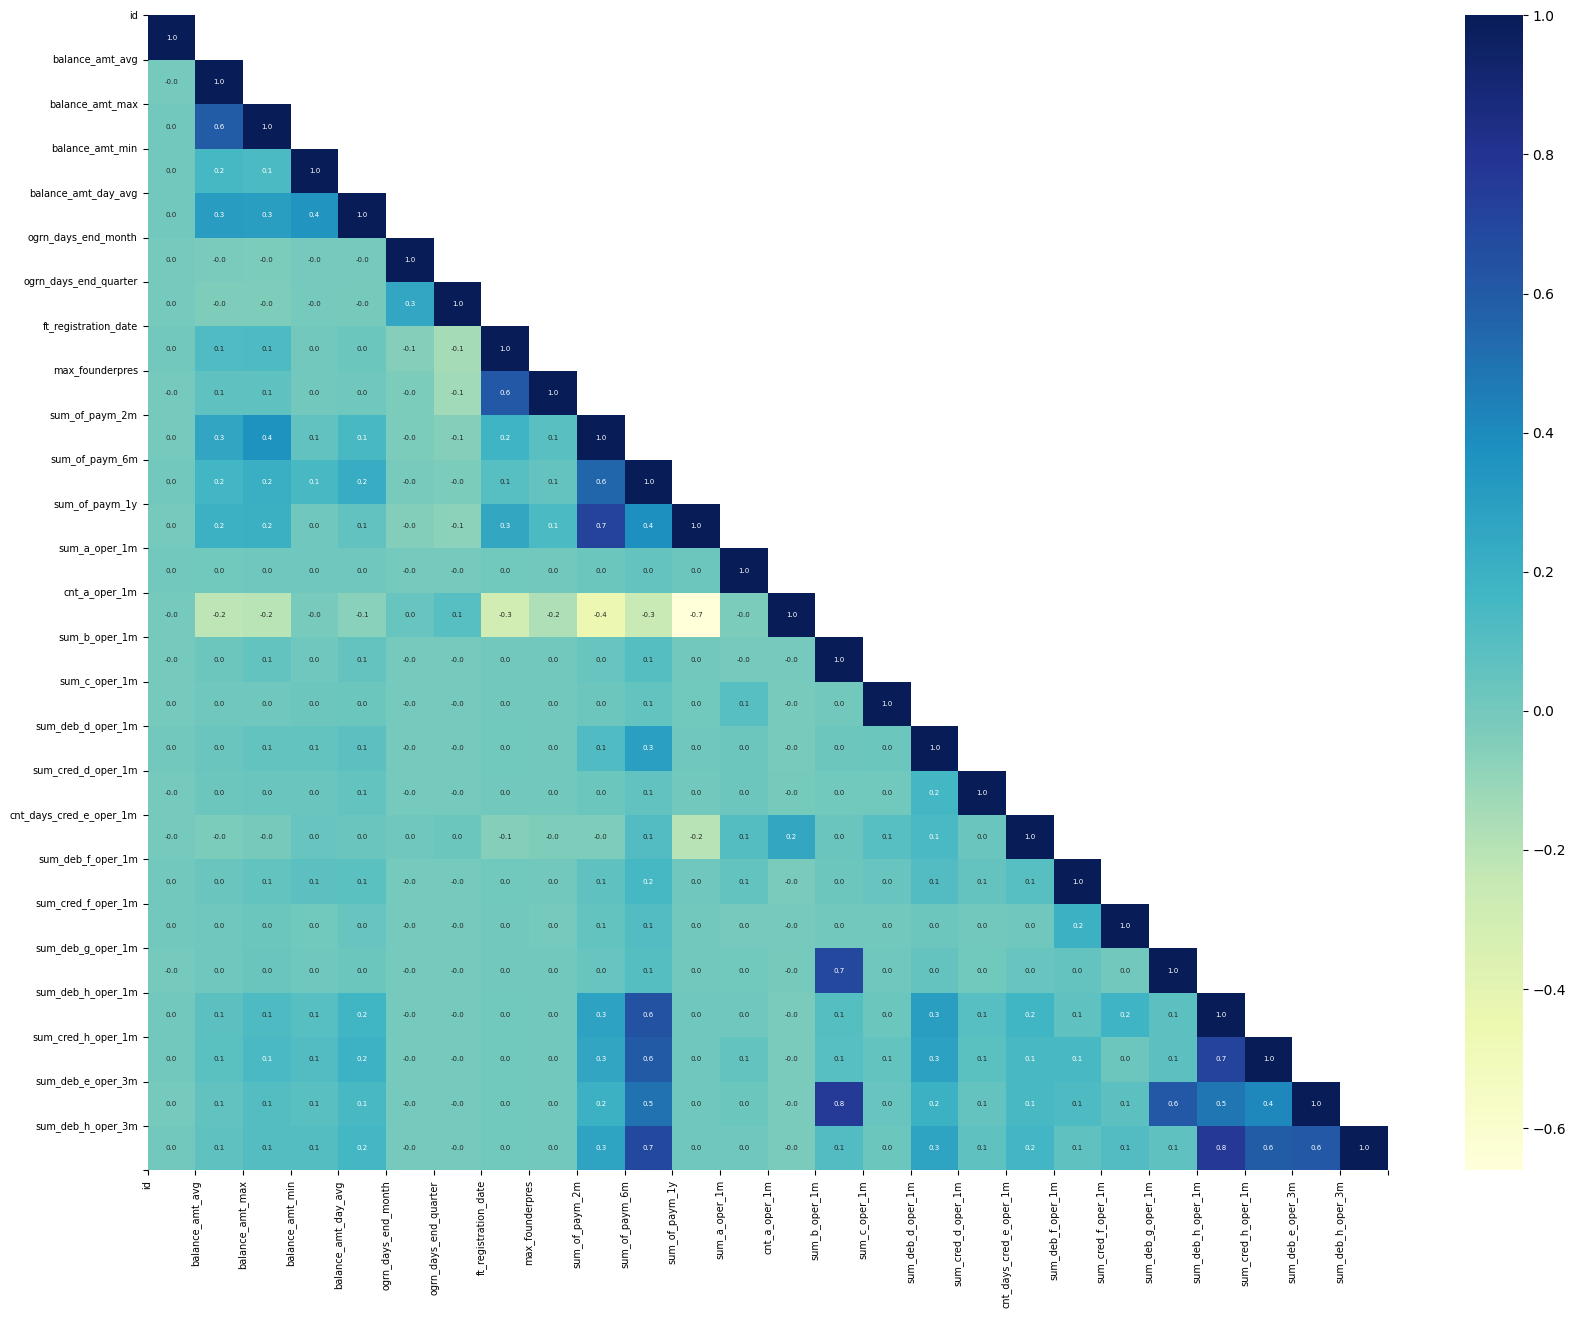

In [ ]:
figure(figsize=(20, 15))
dataplot = sns.heatmap(num_type_corr_train, mask=mask,
                      cmap="YlGnBu", annot=True, fmt=".1f",
                      annot_kws={'size': 5})
dataplot.xaxis.set_major_locator(MaxNLocator(len(num_type_corr_train.columns)))
dataplot.yaxis.set_major_locator(MaxNLocator(len(num_type_corr_train.columns)))
dataplot.set_xticklabels(num_type_corr_train.columns, rotation=90, fontsize=7)
dataplot.set_yticklabels(num_type_corr_train.columns, rotation=0, fontsize=7)
plt.show()

### Предобработка категориальных признаков


In [ ]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "date",
    "index_city_code", "ogrn_month", "ogrn_year"
]

#### Кодирование категориальных признаков

In [ ]:
train_cat = train_df[cat_cols]
display(train_cat.head(2))

for col in cat_cols:
    train_cat[col] = train_cat[col].str.replace(r'[^\d]+', '', regex=True).astype(int)
    train_df[col] = train_df[col].str.replace(r'[^\d]+', '', regex=True).astype(int)
    test_df[col] = test_df[col].str.replace(r'[^\d]+', '', regex=True).astype(int)
train_cat.head(2)

,channel_code,city,city_type,okved,segment,date,index_city_code,ogrn_month,ogrn_year
0,channel_code_5,city_23,city_type_0,okved_30,segment_1,month_1,index_city_code_39,ogrn_month_0,ogrn_year_1
1,channel_code_5,city_23,city_type_0,okved_30,segment_1,month_2,index_city_code_39,ogrn_month_0,ogrn_year_1


,channel_code,city,city_type,okved,segment,date,index_city_code,ogrn_month,ogrn_year
0,5,23,0,30,1,1,39,0,1
1,5,23,0,30,1,2,39,0,1


#### Корреляция категориальных признаков

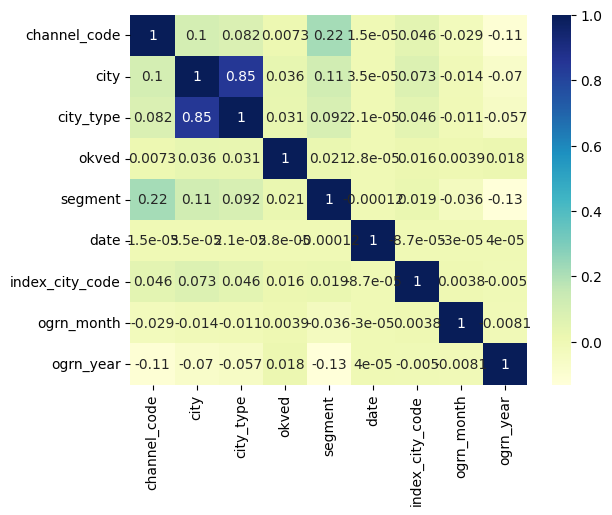

In [ ]:
dataplot = sns.heatmap(train_cat.corr(), cmap="YlGnBu", annot=True)
plt.show()

Корреляция незначительная

### Восстановление признака start_cluster через модель

In [ ]:
test_df_6_m = test_df[test_df['date'] == 6]

#### Подготовка данных и модели

In [ ]:
train_to_restore = pd.concat([
    train_df.dropna(axis=0, how='any'),
    test_df[test_df['date'] != 6].dropna(axis=0, how='any')
], ignore_index=True)

In [ ]:
le = LabelEncoder()
train_to_restore["start_cluster"] = le.fit_transform(train_to_restore["start_cluster"])
le2 = LabelEncoder()
train_to_restore["end_cluster"] = le2.fit_transform(train_to_restore["end_cluster"])

In [ ]:
X = train_to_restore.drop(["date", "id", "start_cluster"], axis=1)
y = train_to_restore["end_cluster"]
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(624192, 34) (156048, 34) (624192,) (156048,)


#### Обучение

In [ ]:
model = RandomForestClassifier(max_depth=20, criterion='log_loss',
                               min_samples_split=10, random_state=0, n_jobs=-1)
model.fit(x_train, y_train)
pred = model.predict(x_train)
print(f"Точность на тренировочных данных: {round(accuracy_score(y_train, pred) * 100, 2)}%")
pred = model.predict(x_val)
print(f"Точность на тестовых данных: {round(accuracy_score(y_val, pred) * 100, 2)}%")

Точность на тренировочных данных: 99.97%
Точность на тестовых данных: 98.4%


In [ ]:
pkl_filename = "rfc_fo_start_cluster.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

#### Восстановление start_cluster

In [ ]:
def restore(row):
    row = row[:-1].values.reshape(1, -1)
    if pd.isnull(row).any():
        return
    pred = int(model.predict([row[0][1:]])[0])
    if pred > 16:
        return
    pred = le.inverse_transform([pred])[0]
    return pred

In [ ]:
tqdm.pandas()
test_df_6_m['start_cluster'] = test_df_6_m.progress_apply(restore, axis=1)

100%|██████████| 100000/100000 [42:50<00:00, 38.90it/s]


После восстановления осталось пустых значений в start_cluster

In [ ]:
test_df_6_m[test_df_6_m['date'] == 6]['start_cluster'].isna().sum()

7666

In [ ]:
test_df_6_m["start_cluster"].unique()

array(['{other}', '{α, γ}', None, '{α, β}', '{}', '{α}', '{α, δ}',
       '{α, η}', '{α, ε}'], dtype=object)

### Сохранение предобработанных данных

In [ ]:
test_df = pd.concat([test_df[test_df['date'] != 6], test_df_6_m], ignore_index=True)

In [ ]:
test_df.to_parquet('test_restored_dk.parquet')
train_df.to_parquet('train_restored_dk.parquet')